## [Image Augmentation](https://jungnamgyu.tistory.com/32)
> 심층 신경망에서 데이터셋을 사용할 경우 대규모 데이터셋일수록 모델의 의존도를 줄일 수 있고, 이에 따른 일반화 능력이 향상된다.  
> 따라서 심층 신경망의 성공적인 학습을 위해 동일한 이미지를 `위치, 밝기, 색도`와 같은 요소들을 무작위로 조절하면서 다양한 데이터를 만드는 것이다.  
> 이러한 이미지 확대 기술은 심층 신경망의 성공에 크게 기여를 했으며, 이미지를 무작위로 변환해주는 작업은 다양한 모듈에서 제공을 해주고 있다.  
  
```python
transforms.Compose([
  transforms.ToFILImage(),
  transforms.ToTensor(),
  transforms.Normalize(mena(0.5,), std=(0.5,))
])
```
#### [함수](https://green-late7.tistory.com/56)
- transforms.ToPILImage(): csv 파일로 데이터셋을 받을 경우, PIL image로 바꿔준다.
- transforms.CenterCrop(size): 가운데 부분을 size 크기로 자른다.
- transforms.Grayscale(num_output_channels=1): grayscale로 변환한다.
- transforms.RandomAffine(degrees): 랜덤으로 affine 변형을 한다.
- transforms.RandomCrop(size): 이미지를 랜덤으로 아무데나 잘라 size 크기로 출력한다.  
- transforms.RandomResizedCrop(size): 이미지 사이즈를 size로 변경한다.
- transforms.Resize(size): 이미지 사이즈를 size로 변경한다.
- transforms.RandomRotation(degrees): 이미지를 랜덤으로 degrees 각도로 회전한다.
- transforms.RandomResizedCrop(size, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333)): 이미지를 랜덤으로 변형한다.
- transforms.RandomVerticalFlip(p=0.5): 이미지를 랜덤으로 수직으로 뒤집는다. (p=0 이면, 뒤집지 않는다.)
- transforms.RandomHorizontalFlip(p=0.5): 이미지를 랜덤으로 수평으로 뒤집는다.
- trnasforms.ToTensor(): 이미지 데이터를 tensor로 바꿔준다.
- transforms.Normalize(mean, std, implace=False): 이미지를 정규화한다. 

In [1]:
from d2l import torch as d2l
import torch
import torchvision
from torch import nn


import matplotlib.pyplot as plt
plt.ion()   # 대화형 모드

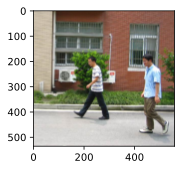

In [3]:
d2l.set_figsize()
img = d2l.Image.open('./data/PennFudanPed/PNGImages/FudanPed00001.png')
d2l.plt.imshow(img)

In [2]:
"""
실질적인 명령어는 aug에 들어가게 되고 List Y을 생성할 때, aug(img)를 통해 변화된 이미지를 List의 크기만큼 저장한다.
show_images에 사용되는 scale은 이미지를 어느 정도의 크기로 확대해서 보여주는지를 의미한다.
"""
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
  Y = [aug(img) for _ in range(num_rows * num_cols)]
  d2l.show_images(Y, num_rows, num_cols, scale=scale)

#### 이미지 뒤집기 - RandomHorizontalFlip(), RandomVerticalFlip()
> RandomFlip의 경우 뒤집는 확률이 50%이다. Vertical보다는 상대적으로 Horizontal을 더 많이 사용한다.

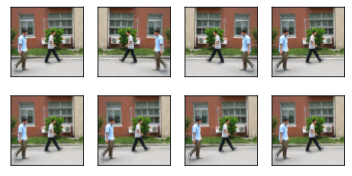

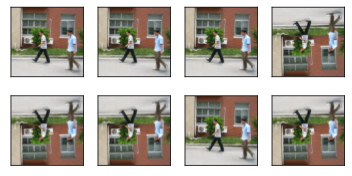

In [4]:
# Horizontal = 좌우반전
apply(img, torchvision.transforms.RandomHorizontalFlip())
# Verticla = 상하반전
apply(img, torchvision.transforms.RandomVerticalFlip())

#### 이미지 잘라내기 - RandomResizedCrop()
> (200, 200)은 출력할 size를 조정해주는 부분이다.  
> scale(0.1, 1)은 면적의 비율 0.1-1(10% - 100%)를 무작위로 자르게 된다.  
> ratio(0.5, 2)은 면적의 너비와 높이의 비율 0.5 - 2를 무작위로 조절한다.  
  
ratio를 통해 너비와 비율을 조절한 뒤 scale를 통해 자르고, 최종적으로 출력할 size로 조정을 한다.

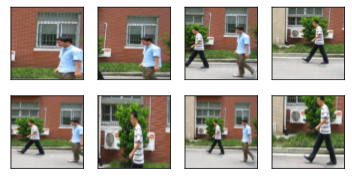

In [5]:
shape_aug = torchvision.transforms.RandomResizedCrop(
  (200, 200), scale=(0.1, 1), ratio=(0.5, 2)
)

apply(img, shape_aug)

#### 색깔 바꾸기 - ColorJitter()
> 인자에서 0.5의 값은 1(100%)을 기준으로 +0.5 ~ -0.5의 범위에서 무작위로 고르겠다는 의미이다.  
> 즉 범위는 (1-0.5 ~ 1+0.5)에서 무작위로 고르는 것이다.

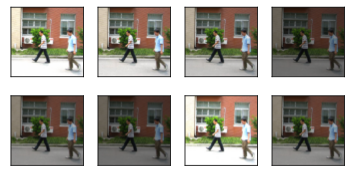

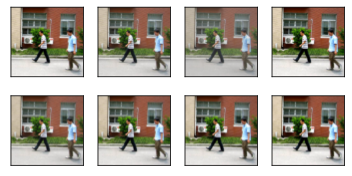

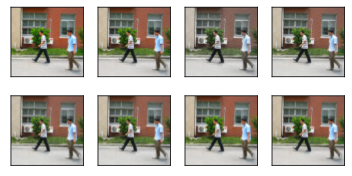

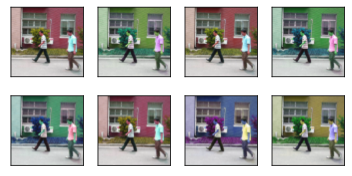

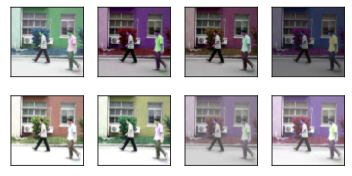

In [6]:
apply(img, torchvision.transforms.ColorJitter(brightness=0.5)) # 밝기
apply(img, torchvision.transforms.ColorJitter(contrast=0.5)) # 대비
apply(img, torchvision.transforms.ColorJitter(saturation=0.5)) # 채도
apply(img, torchvision.transforms.ColorJitter(hue=0.5)) # 색조

color_aug = torchvision.transforms.ColorJitter(
  brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5
)
apply(img, color_aug)

### 이미지 처리 한번에 합치기 - Compose()
> 원하는 이미지 처리를 List 형식으로 모아서 Compose에 입력을 하면  
> Compose에서는 이미지 처리 모듈이 들어있는 List를 덮어 하나의 모듈로 합쳐준다.

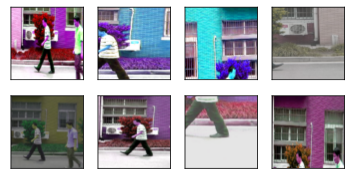

In [7]:
augs = torchvision.transforms.Compose([
  torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug
])
apply(img, augs)